# Heart Disease


# Import Needed Pakages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import f_classif,SelectKBest
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.pipeline import Pipeline

In [2]:
data = pd.read_csv("C:\\Users\\AHMED\\Desktop\\heart2.csv")
data.tail()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0

In [3]:
data.shape

(303, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
data.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

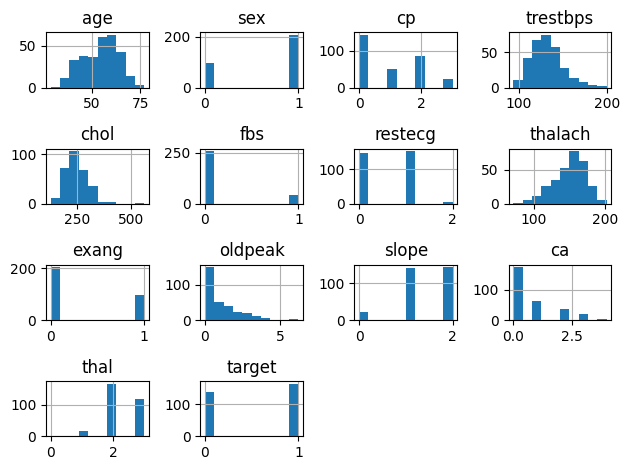

In [7]:
data.hist(list(data.columns), bins=10)
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Number of Major Vessels Distribution'}, xlabel='ca'>

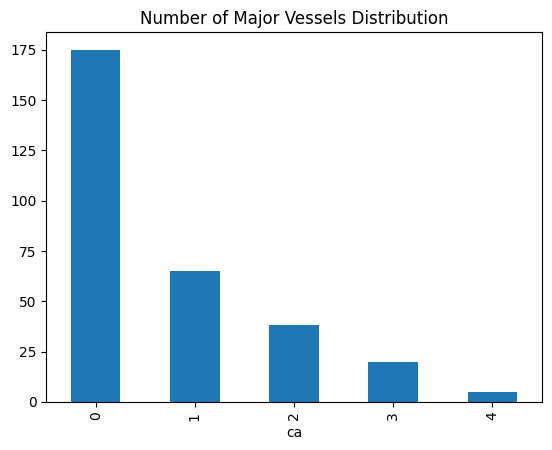

In [8]:
data['ca'].value_counts().plot(kind='bar', title='Number of Major Vessels Distribution')

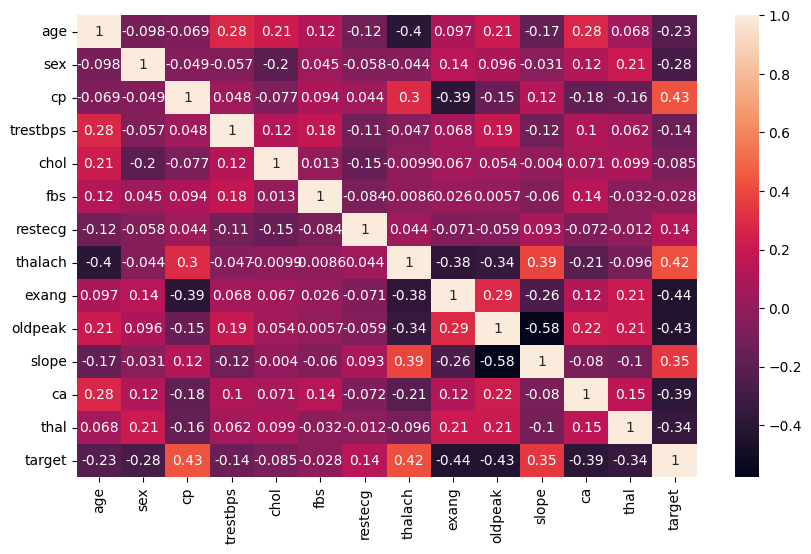

In [9]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
numeric_df = data[numeric_columns]

plt.figure(figsize=(10, 6))
plt.tight_layout()
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

<Axes: xlabel='target', ylabel='count'>

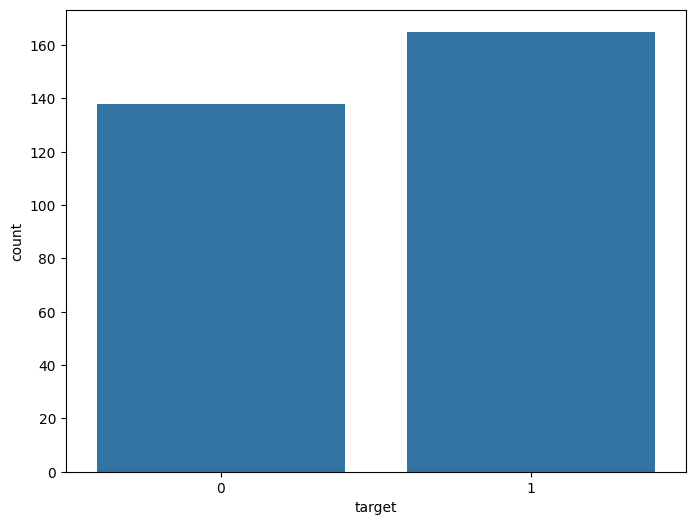

In [27]:
plt.figure(figsize=(8,6))
sns.countplot(data,x="target")

In [32]:
X = data.drop(columns=["target"], axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(242, 13) (61, 13)
(242,) (61,)


In [33]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 242 entries, 19 to 110
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       242 non-null    int64  
 1   sex       242 non-null    int64  
 2   cp        242 non-null    int64  
 3   trestbps  242 non-null    int64  
 4   chol      242 non-null    int64  
 5   fbs       242 non-null    int64  
 6   restecg   242 non-null    int64  
 7   thalach   242 non-null    int64  
 8   exang     242 non-null    int64  
 9   oldpeak   242 non-null    float64
 10  slope     242 non-null    int64  
 11  ca        242 non-null    int64  
 12  thal      242 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 26.5 KB


In [34]:
preprocessing = Pipeline([
    ('imputer', SimpleImputer()),
    ('scaler', MinMaxScaler()),
    ('selector', SelectKBest(f_classif, k=11))
])

X_train = preprocessing.fit_transform(X_train, y_train)
X_test = preprocessing.transform(X_test)

In [35]:
selector = preprocessing.named_steps['selector']
selected_features_mask = selector.get_support()
selected_feature_names = X.columns[selected_features_mask]

print("Selected features:", selected_feature_names)

Selected features: Index(['age', 'sex', 'cp', 'chol', 'restecg', 'thalach', 'exang', 'oldpeak',
       'slope', 'ca', 'thal'],
      dtype='object')


In [36]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(242, 11) (61, 11)
(242,) (61,)


# Logistic Regression Pipelining


In [37]:
lr = LogisticRegression(random_state=555)
lr_params = {
    'classifier__C': np.logspace(-4, 4, 20),
    'classifier__solver': ['liblinear']
}
lr_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  
    ('scaler', MinMaxScaler()),               
    ('classifier', lr)     
])
lr_search = RandomizedSearchCV(lr_pipeline, lr_params, n_iter=10, cv=5, scoring='accuracy', random_state=42)
lr_search.fit(X_train, y_train)
best_lr_pipeline = lr_search.best_estimator_
print("Best LR params:", lr_search.best_params_)

Best LR params: {'classifier__solver': 'liblinear', 'classifier__C': 1438.44988828766}


In [38]:
classifier_solver = lr_search.best_params_[f'classifier__solver']
C = lr_search.best_params_['classifier__C']
lr = LogisticRegression(random_state=555,solver=classifier_solver,C=C)

lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [39]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1: {f1}')

Accuracy: 0.7868852459016393
Precision: 0.7631578947368421
Recall: 0.8787878787878788
F1: 0.8169014084507042


Confusion Matrix:


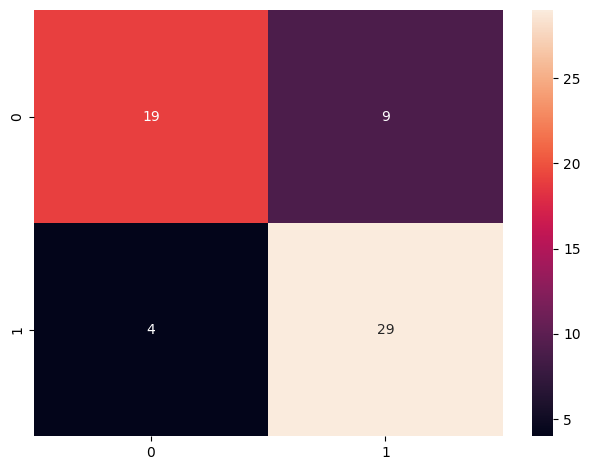

In [40]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.tight_layout()
plt.show()

# RandomForest Pipelining

In [41]:
RF = RandomForestClassifier(random_state=555)
rf_params = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}
RF_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  
    ('scaler', MinMaxScaler()),               
    ('classifier', RF)    
])
rf_search = RandomizedSearchCV(RF_pipeline, rf_params, n_iter=10, cv=5, scoring='accuracy', random_state=42)
rf_search.fit(X_train, y_train)
best_rf_pipeline = rf_search.best_estimator_
print("Best RF params:", rf_search.best_params_)

Best RF params: {'classifier__n_estimators': 50, 'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 1, 'classifier__max_depth': 10}


In [42]:
classifier__n_estimators = rf_search.best_params_['classifier__n_estimators']
classifier__min_samples_split = rf_search.best_params_['classifier__min_samples_split']
classifier__min_samples_leaf = rf_search.best_params_['classifier__min_samples_leaf']
classifier__max_depth = rf_search.best_params_['classifier__max_depth']

RF = RandomForestClassifier(n_estimators=classifier__n_estimators,min_samples_leaf=classifier__min_samples_leaf,min_samples_split=classifier__min_samples_split,max_depth=classifier__max_depth,random_state=555)
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)

In [43]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1: {f1}')

Accuracy: 0.7704918032786885
Precision: 0.7209302325581395
Recall: 0.9393939393939394
F1: 0.8157894736842105


Confusion Matrix:


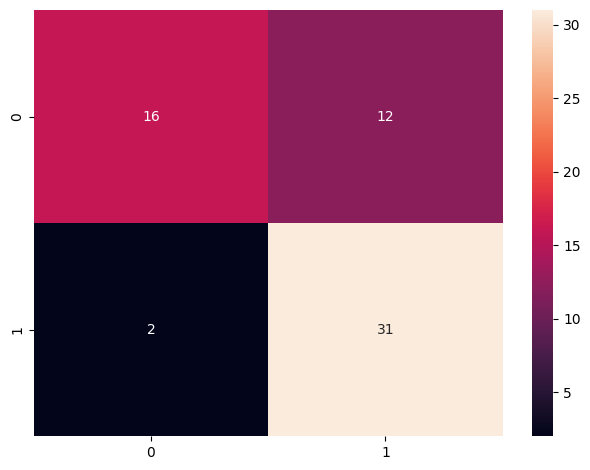

In [44]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
sns.heatmap(cm,annot=True)
plt.tight_layout()
plt.show()

### SUPPORT VECTOR MACHINES Pipelining

In [45]:
SVM = SVC(random_state=555,probability=True)
svm_params = {
    'classifier__C': np.logspace(-4, 4, 20),
    'classifier__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'classifier__degree': [2, 3, 4]
}
SVM_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  
    ('scaler', MinMaxScaler()),               
    ('classifier', SVM)     
])
svm_search = RandomizedSearchCV(SVM_pipeline, svm_params, n_iter=10, cv=5, scoring='accuracy', random_state=42)
svm_search.fit(X_train, y_train)
best_svm_pipeline = svm_search.best_estimator_
print("Best SVM params:", svm_search.best_params_)

Best SVM params: {'classifier__kernel': 'poly', 'classifier__degree': 2, 'classifier__C': 0.615848211066026}


In [46]:
classifier__kernel = svm_search.best_params_['classifier__kernel']
classifier__degree = svm_search.best_params_['classifier__degree']
classifier__C = svm_search.best_params_['classifier__C']

SVM = SVC(random_state=555,kernel=classifier__kernel,degree=classifier__degree,C=classifier__C,probability=True)
SVM.fit(X_train,y_train)
y_pred = SVM.predict(X_test)

In [47]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1: {f1}')

Accuracy: 0.8360655737704918
Precision: 0.7804878048780488
Recall: 0.9696969696969697
F1: 0.8648648648648649


Confusion Matrix:


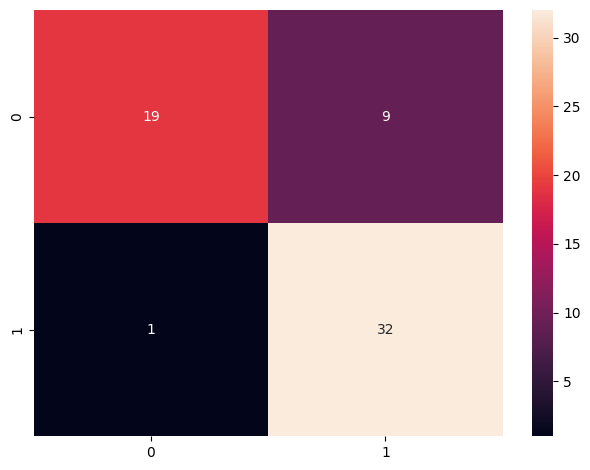

In [48]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
sns.heatmap(cm,annot=True)
plt.tight_layout()
plt.show()

# KNN

In [49]:
KNN = KNeighborsClassifier()
knn_params = {
    'classifier__n_neighbors': range(1, 31),
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan', 'minkowski']
}
KNN_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  
    ('scaler', MinMaxScaler()),               
    ('classifier', KNN)     
])
knn_search = RandomizedSearchCV(KNN_pipeline, knn_params, n_iter=10, cv=5, scoring='accuracy', random_state=42)
knn_search.fit(X_train, y_train)
best_knn_pipeline = knn_search.best_estimator_
print("Best KNN params:", knn_search.best_params_)

Best KNN params: {'classifier__weights': 'uniform', 'classifier__n_neighbors': 10, 'classifier__metric': 'manhattan'}


In [50]:
classifier__weights=knn_search.best_params_['classifier__weights']
classifier__n_neighbors=knn_search.best_params_['classifier__n_neighbors']
classifier__metric=knn_search.best_params_['classifier__metric']
KNN = KNeighborsClassifier(weights=classifier__weights,n_neighbors=classifier__n_neighbors,metric=classifier__metric)
KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)

In [51]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1: {f1}')

Accuracy: 0.819672131147541
Precision: 0.8055555555555556
Recall: 0.8787878787878788
F1: 0.8405797101449275


Confusion Matrix:


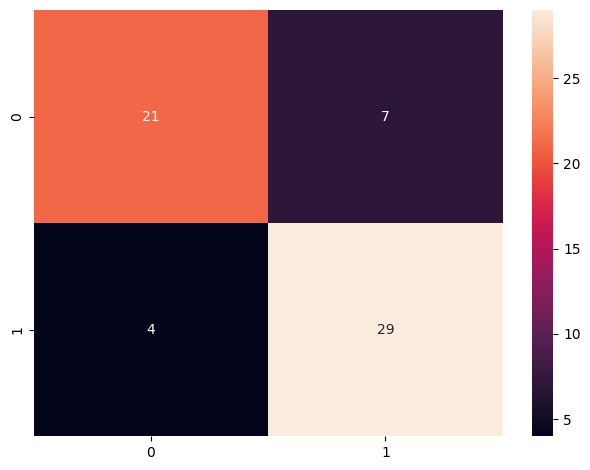

In [52]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
sns.heatmap(cm,annot=True)
plt.tight_layout()
plt.show()

# XGBOOST

In [53]:
xgb = XGBClassifier(random_state=555)
xgb_params = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.05, 0.1, 0.3],
    'classifier__max_depth': [3, 5, 7, 10]
}
XGB_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  
    ('scaler', MinMaxScaler()),               
    ('classifier', xgb)     
])
xgb_search = RandomizedSearchCV(XGB_pipeline, xgb_params, n_iter=10, cv=5, scoring='accuracy', random_state=42)
xgb_search.fit(X_train, y_train)
best_xgb_pipeline = xgb_search.best_estimator_
print("Best XGB params:", xgb_search.best_params_)

Best XGB params: {'classifier__n_estimators': 50, 'classifier__max_depth': 5, 'classifier__learning_rate': 0.1}


In [54]:
classifier__n_estimators = xgb_search.best_params_['classifier__n_estimators']
classifier__max_depth = xgb_search.best_params_['classifier__max_depth']
classifier__learning_rate = xgb_search.best_params_['classifier__learning_rate']

xgb = XGBClassifier(random_state=555,n_estimators = classifier__n_estimators,max_depth = classifier__max_depth,learning_rate=classifier__learning_rate)
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)

In [55]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1: {f1}')

Accuracy: 0.8032786885245902
Precision: 0.7692307692307693
Recall: 0.9090909090909091
F1: 0.8333333333333334


Confusion Matrix:


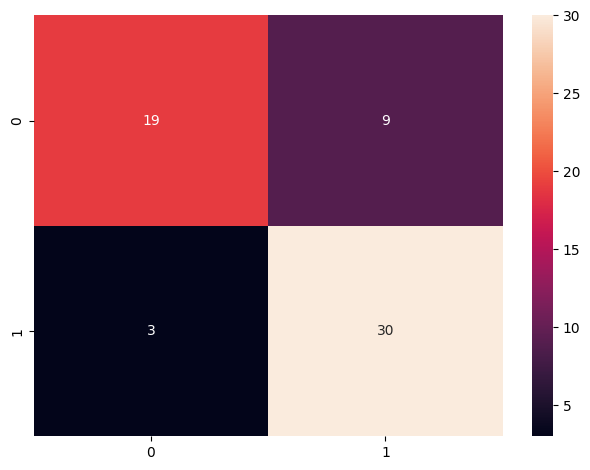

In [56]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
sns.heatmap(cm,annot=True)
plt.tight_layout()
plt.show()

# Neural Network

In [59]:
import tensorflow as tf
from tensorflow.keras.layers import Dense  
from tensorflow.keras.models import Sequential
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import  validation_curve
from sklearn.model_selection import RandomizedSearchCV

In [60]:
X_train.shape

(922, 10)

In [90]:
def create_model(nl=1, nn=16, optimizer='adam'):
    model = Sequential()
    model.add(Dense(10, input_shape=(X_train.shape[1],), activation='relu'))  
    model.add(Dense(units=nn, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  
    model.compile(loss='binary_crossentropy', optimizer=optimizer)
    return model

In [91]:
model = KerasClassifier(build_fn=create_model)

In [92]:
# Define hyperparameters for RandomizedSearchCV
params = {
    'optimizer': ['sgd', 'adam'],
    'epochs': [10, 50, 100],
    'batch_size': [5, 10, 20],
}

# Perform RandomizedSearchCV with accuracy as the scoring metric
nn_cv = RandomizedSearchCV(estimator=model, param_distributions=params, cv=5, scoring='accuracy', verbose=2)
nn_cv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.7545
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6562
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5240
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4541
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4032
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3939
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4208
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3663
Epoch 9/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3737
Epoch 10/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3554
Epoch 11/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3529
Epoch 12/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3410
Epoch 13/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3958
Epoch 14/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3650
Epoch 15/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3658
Epoch 16/50
74/74 ━

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6783
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - loss: 0.5893
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5163
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4673
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4299
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4323
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3992
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3480
Epoch 9/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - loss: 0.3879
Epoch 10/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - loss: 0.4070
Epoch 11/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3789
Epoch 12/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3894  
Epoch 13/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - loss: 0.3409
Epoch 14/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - loss: 0.3561
Epoch 15/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - loss: 0.3726
Epoch 16/50
74/

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6929
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6505
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5885
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5169
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4582
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - loss: 0.4093
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4111  
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - loss: 0.4277
Epoch 9/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3630
Epoch 10/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4116
Epoch 11/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3532
Epoch 12/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3582
Epoch 13/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3702
Epoch 14/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3330
Epoch 15/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3114
Epoch 16/50
74/74 ━━━━━━

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.6965
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6177
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5212
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4556
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4465
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4262
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4281
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4346  
Epoch 9/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4183
Epoch 10/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3871
Epoch 11/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4248
Epoch 12/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3583
Epoch 13/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3739
Epoch 14/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3968
Epoch 15/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3730  
Epoch 16/50
74/74 ━━━━━━━━

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6682   
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5865
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4948
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4436
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4429
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3993  
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3974
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3839
Epoch 9/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3700
Epoch 10/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3740
Epoch 11/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3863
Epoch 12/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3709
Epoch 13/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3982
Epoch 14/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3512
Epoch 15/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3915
Epoch 16/50
74/74 ━━━━━━━

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6451
Epoch 2/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5520
Epoch 3/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4798
Epoch 4/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4405
Epoch 5/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - loss: 0.4152
Epoch 6/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - loss: 0.4037
Epoch 7/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3912
Epoch 8/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3394
Epoch 9/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3818
Epoch 10/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3615
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
[CV] END ...........batch_size=10, epochs=10, optimizer=adam; total time=   3.0s
Epoch 1/10


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 896us/step - loss: 0.7021
Epoch 2/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - loss: 0.6452
Epoch 3/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step - loss: 0.5975
Epoch 4/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5310  
Epoch 5/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4922
Epoch 6/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - loss: 0.4415
Epoch 7/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step - loss: 0.4206
Epoch 8/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step - loss: 0.4303
Epoch 9/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - loss: 0.3956
Epoch 10/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3766
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
[CV] END ...........batch_size=10, epochs=10, optimizer=adam; total time=   3.3s
Epoch 1/10


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7096
Epoch 2/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6425  
Epoch 3/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5425
Epoch 4/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step - loss: 0.4644
Epoch 5/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4361
Epoch 6/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4415
Epoch 7/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3843
Epoch 8/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3687
Epoch 9/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - loss: 0.3723
Epoch 10/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3758
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
[CV] END ...........batch_size=10, epochs=10, optimizer=adam; total time=   2.7s
Epoch 1/10


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 973us/step - loss: 0.6923 
Epoch 2/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6181
Epoch 3/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - loss: 0.5085
Epoch 4/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - loss: 0.4781
Epoch 5/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4271
Epoch 6/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4209
Epoch 7/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4260
Epoch 8/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - loss: 0.4184
Epoch 9/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4095
Epoch 10/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3572
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
[CV] END ...........batch_size=10, epochs=10, optimizer=adam; total time=   2.1s
Epoch 1/10


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6342   
Epoch 2/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5699
Epoch 3/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - loss: 0.5090
Epoch 4/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - loss: 0.4722
Epoch 5/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step - loss: 0.4230
Epoch 6/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - loss: 0.4100
Epoch 7/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3900
Epoch 8/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3995
Epoch 9/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3710
Epoch 10/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - loss: 0.3774
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[CV] END ...........batch_size=10, epochs=10, optimizer=adam; total time=   1.9s
Epoch 1/100


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 965us/step - loss: 0.6771
Epoch 2/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5605
Epoch 3/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4569
Epoch 4/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4105
Epoch 5/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4089
Epoch 6/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3761
Epoch 7/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3522
Epoch 8/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - loss: 0.3747
Epoch 9/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3605
Epoch 10/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3463
Epoch 11/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3573
Epoch 12/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3249
Epoch 13/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3269
Epoch 14/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3350
Epoch 15/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6780
Epoch 2/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5821
Epoch 3/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4872
Epoch 4/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4180
Epoch 5/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3904
Epoch 6/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3587
Epoch 7/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3780
Epoch 8/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3962
Epoch 9/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3909
Epoch 10/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3853
Epoch 11/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3416
Epoch 12/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3826
Epoch 13/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3451
Epoch 14/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3231
Epoch 15/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6466
Epoch 2/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5372
Epoch 3/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4426
Epoch 4/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3891
Epoch 5/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3932
Epoch 6/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3673
Epoch 7/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3621
Epoch 8/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3843
Epoch 9/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3492
Epoch 10/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3539
Epoch 11/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3233
Epoch 12/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3285
Epoch 13/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2966
Epoch 14/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2956
Epoch 15/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6709
Epoch 2/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5498
Epoch 3/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4653
Epoch 4/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4442
Epoch 5/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4254
Epoch 6/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4246
Epoch 7/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3833
Epoch 8/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4220
Epoch 9/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3897
Epoch 10/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3829
Epoch 11/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3871
Epoch 12/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - loss: 0.3582
Epoch 13/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3921 
Epoch 14/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3450
Epoch 15/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/ste

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6628
Epoch 2/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5764
Epoch 3/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4503
Epoch 4/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4465
Epoch 5/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4167
Epoch 6/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3898
Epoch 7/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3832
Epoch 8/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3720
Epoch 9/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3685
Epoch 10/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3650
Epoch 11/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3626
Epoch 12/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2981
Epoch 13/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3371
Epoch 14/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3570
Epoch 15/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6799
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6421
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6019 
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5495 
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4958
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4588 
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4254
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4160
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 0.3970
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4317
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
[CV] END ...........batch_size=20, epochs=10, optimizer=adam; total time=   3.5s
Epoch 1/10


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6839
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6606
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - loss: 0.6343
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - loss: 0.5787
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - loss: 0.5545
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - loss: 0.5272
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - loss: 0.4779
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - loss: 0.4465
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4247
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4176 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
[CV] END ...........batch_size=20, epochs=10, optimizer=adam; total time=   2.2s
Epoch 1/10


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6257   
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step - loss: 0.5654
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - loss: 0.5278
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step - loss: 0.4849
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step - loss: 0.4600
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step - loss: 0.4216
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - loss: 0.4439
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - loss: 0.4249
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - loss: 0.3546
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3640
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
[CV] END ...........batch_size=20, epochs=10, optimizer=adam; total time=   1.5s
Epoch 1/10


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 864us/step - loss: 0.6916 
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - loss: 0.6427
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6151 
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5582 
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5104 
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4701 
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4576 
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4372 
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4281 
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3719 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
[CV] END ...........batch_size=20, epochs=10, optimizer=adam; total time=   1.7s
Epoch 1/10


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 936us/step - loss: 0.7670 
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - loss: 0.6870
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 0.6510
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - loss: 0.6118
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - loss: 0.5613
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - loss: 0.5104
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - loss: 0.4502
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - loss: 0.4512
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - loss: 0.4390
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - loss: 0.4091
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
[CV] END ...........batch_size=20, epochs=10, optimizer=adam; total time=   1.4s
Epoch 1/50


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 780us/step - loss: 0.6727
Epoch 2/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - loss: 0.5965
Epoch 3/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 0.4984
Epoch 4/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - loss: 0.4291
Epoch 5/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - loss: 0.4297
Epoch 6/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - loss: 0.3834
Epoch 7/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step - loss: 0.3412
Epoch 8/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - loss: 0.4064
Epoch 9/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - loss: 0.3597
Epoch 10/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step - loss: 0.3424
Epoch 11/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - loss: 0.3557
Epoch 12/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - loss: 0.3821
Epoch 13/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - loss: 0.3082
Epoch 14/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - loss: 0.3564
Epoch 15/50
148/148 ━━━━━━━━━━━━━━━━━━━━

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 833us/step - loss: 0.7013
Epoch 2/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6446
Epoch 3/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5243
Epoch 4/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4701
Epoch 5/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4201
Epoch 6/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step - loss: 0.4113
Epoch 7/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4106
Epoch 8/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - loss: 0.4064
Epoch 9/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - loss: 0.3843
Epoch 10/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step - loss: 0.3934
Epoch 11/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - loss: 0.3792
Epoch 12/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3703
Epoch 13/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3307
Epoch 14/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3480
Epoch 15/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step -

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6943
Epoch 2/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - loss: 0.6417
Epoch 3/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - loss: 0.5352
Epoch 4/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - loss: 0.4780
Epoch 5/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4242
Epoch 6/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - loss: 0.3954
Epoch 7/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3854
Epoch 8/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4023
Epoch 9/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3662
Epoch 10/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3659
Epoch 11/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3659
Epoch 12/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - loss: 0.3534
Epoch 13/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - loss: 0.3594
Epoch 14/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - loss: 0.3536
Epoch 15/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 988us/step - loss: 0.6793
Epoch 2/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - loss: 0.5940
Epoch 3/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4580
Epoch 4/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4008
Epoch 5/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3848
Epoch 6/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step - loss: 0.4093
Epoch 7/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3998 
Epoch 8/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - loss: 0.3425
Epoch 9/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - loss: 0.3406
Epoch 10/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - loss: 0.3905
Epoch 11/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4245
Epoch 12/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - loss: 0.3998
Epoch 13/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - loss: 0.3259
Epoch 14/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - loss: 0.3762
Epoch 15/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 858us

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 900us/step - loss: 0.6643
Epoch 2/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step - loss: 0.5196
Epoch 3/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step - loss: 0.4754
Epoch 4/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - loss: 0.4156
Epoch 5/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step - loss: 0.4010
Epoch 6/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - loss: 0.3824
Epoch 7/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - loss: 0.4173
Epoch 8/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3931
Epoch 9/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - loss: 0.3859
Epoch 10/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - loss: 0.3748
Epoch 11/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step - loss: 0.3712
Epoch 12/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - loss: 0.3567
Epoch 13/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3565
Epoch 14/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - loss: 0.3481
Epoch 15/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 957us/step - loss: 0.6510 
Epoch 2/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - loss: 0.5894
Epoch 3/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - loss: 0.5310
Epoch 4/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - loss: 0.4482
Epoch 5/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3963
Epoch 6/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - loss: 0.3818
Epoch 7/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step - loss: 0.4017
Epoch 8/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - loss: 0.3728
Epoch 9/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step - loss: 0.3647
Epoch 10/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - loss: 0.3942
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[CV] END ............batch_size=10, epochs=10, optimizer=sgd; total time=   1.9s
Epoch 1/10


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6705   
Epoch 2/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step - loss: 0.6163
Epoch 3/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - loss: 0.5346
Epoch 4/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4653
Epoch 5/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - loss: 0.3903
Epoch 6/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - loss: 0.4089
Epoch 7/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - loss: 0.3905
Epoch 8/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - loss: 0.3932
Epoch 9/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - loss: 0.3840
Epoch 10/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - loss: 0.3596
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[CV] END ............batch_size=10, epochs=10, optimizer=sgd; total time=   1.9s
Epoch 1/10


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7186   
Epoch 2/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step - loss: 0.6247
Epoch 3/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - loss: 0.5110
Epoch 4/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - loss: 0.4877
Epoch 5/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - loss: 0.4487
Epoch 6/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3934
Epoch 7/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4300
Epoch 8/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - loss: 0.4298
Epoch 9/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - loss: 0.3777
Epoch 10/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - loss: 0.3518
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[CV] END ............batch_size=10, epochs=10, optimizer=sgd; total time=   1.9s
Epoch 1/10


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 952us/step - loss: 0.6914 
Epoch 2/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step - loss: 0.6681
Epoch 3/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - loss: 0.6289
Epoch 4/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - loss: 0.5189
Epoch 5/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - loss: 0.4559
Epoch 6/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - loss: 0.3965
Epoch 7/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - loss: 0.3721
Epoch 8/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3918  
Epoch 9/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - loss: 0.3701
Epoch 10/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step - loss: 0.3590
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
[CV] END ............batch_size=10, epochs=10, optimizer=sgd; total time=   2.0s
Epoch 1/10


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6523   
Epoch 2/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5876
Epoch 3/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - loss: 0.5335
Epoch 4/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - loss: 0.4697
Epoch 5/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - loss: 0.4210
Epoch 6/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - loss: 0.4502
Epoch 7/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - loss: 0.4068
Epoch 8/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3867
Epoch 9/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3895
Epoch 10/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - loss: 0.3702
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[CV] END ............batch_size=10, epochs=10, optimizer=sgd; total time=   1.9s
Epoch 1/50


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.7085
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - loss: 0.6839
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - loss: 0.6680
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - loss: 0.6552
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step - loss: 0.6318
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - loss: 0.6102
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5610 
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - loss: 0.5106
Epoch 9/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - loss: 0.4681
Epoch 10/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - loss: 0.4440
Epoch 11/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - loss: 0.4192
Epoch 12/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - loss: 0.4279
Epoch 13/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - loss: 0.4085
Epoch 14/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - loss: 0.4204
Epoch 15/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - loss: 0.3614
Epo

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7219   
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6500 
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5938 
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - loss: 0.5366
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4604 
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - loss: 0.4662
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - loss: 0.4360
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - loss: 0.3874
Epoch 9/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3952 
Epoch 10/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3929 
Epoch 11/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3916 
Epoch 12/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - loss: 0.3707
Epoch 13/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step - loss: 0.3530
Epoch 14/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - loss: 0.3488
Epoch 15/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - loss: 0.3688
Epoch

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7062  
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - loss: 0.6341
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - loss: 0.5868
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step - loss: 0.5118
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - loss: 0.4652
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - loss: 0.4412
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step - loss: 0.4253
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step - loss: 0.3896
Epoch 9/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - loss: 0.3928
Epoch 10/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3934 
Epoch 11/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3637 
Epoch 12/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3937 
Epoch 13/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - loss: 0.3882
Epoch 14/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - loss: 0.4079
Epoch 15/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - loss: 0.3420
Epo

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6955  
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - loss: 0.6520
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - loss: 0.6059
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - loss: 0.5427
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - loss: 0.4932
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - loss: 0.4514
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - loss: 0.4184
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - loss: 0.3902
Epoch 9/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - loss: 0.3814
Epoch 10/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - loss: 0.3884
Epoch 11/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - loss: 0.3705
Epoch 12/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - loss: 0.3621
Epoch 13/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - loss: 0.3762
Epoch 14/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3789 
Epoch 15/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3456 
Ep

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7289   
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - loss: 0.6192
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - loss: 0.5771
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - loss: 0.4997
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step - loss: 0.4762
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - loss: 0.4366
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - loss: 0.4231
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - loss: 0.3940
Epoch 9/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - loss: 0.4062
Epoch 10/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - loss: 0.3770
Epoch 11/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - loss: 0.3803
Epoch 12/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - loss: 0.3939
Epoch 13/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3423 
Epoch 14/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - loss: 0.3699
Epoch 15/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step - loss: 0.3481


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6510
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6036 
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5665 
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5383 
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5082 
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4695 
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4673 
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4288 
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - loss: 0.4180
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4110 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
[CV] END ............batch_size=20, epochs=10, optimizer=sgd; total time=   1.8s
Epoch 1/10


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6784
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6219 
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5838
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - loss: 0.5318
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4906 
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - loss: 0.4576
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - loss: 0.4659
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - loss: 0.4237
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 0.4186
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4068 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
[CV] END ............batch_size=20, epochs=10, optimizer=sgd; total time=   2.0s
Epoch 1/10


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6834
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6519 
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6155 
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5541 
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4972 
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4922 
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4411 
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4383 
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4204 
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4269 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
[CV] END ............batch_size=20, epochs=10, optimizer=sgd; total time=   2.0s
Epoch 1/10


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.6874
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6690
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6432 
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6078 
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5639 
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5361 
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4844 
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4610
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - loss: 0.4268
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - loss: 0.4100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
[CV] END ............batch_size=20, epochs=10, optimizer=sgd; total time=   2.3s
Epoch 1/10


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 967us/step - loss: 0.6913 
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6311
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5947 
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5452 
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4955 
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4721 
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4297 
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4139 
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4153 
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3853 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
[CV] END ............batch_size=20, epochs=10, optimizer=sgd; total time=   1.6s
Epoch 1/50


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6983   
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6512 
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6024 
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5442 
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5105 
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4830 
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4416 
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4416 
Epoch 9/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4177 
Epoch 10/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4028 
Epoch 11/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4013 
Epoch 12/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - loss: 0.3669
Epoch 13/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - loss: 0.3602
Epoch 14/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - loss: 0.3863
Epoch 15/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3668
Epoch 16/50

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6860
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5960
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5291
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4988
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4489
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4110
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4112 
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4069 
Epoch 9/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4134 
Epoch 10/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - loss: 0.4176
Epoch 11/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4338 
Epoch 12/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3692 
Epoch 13/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3811 
Epoch 14/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - loss: 0.3551
Epoch 15/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - loss: 0.3787
Epoch 16/50
37/37 

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6856
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6172 
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5836 
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5285 
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4842 
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4418 
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4219
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4355 
Epoch 9/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3962
Epoch 10/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3989
Epoch 11/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3773 
Epoch 12/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3779 
Epoch 13/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3739
Epoch 14/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3514
Epoch 15/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3682
Epoch 16/50
37/37 ━━━━

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7043
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6904 
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6761
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6516 
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6219 
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - loss: 0.5720
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - loss: 0.5307
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - loss: 0.4823
Epoch 9/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4606 
Epoch 10/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4822 
Epoch 11/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step - loss: 0.4140
Epoch 12/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - loss: 0.4038
Epoch 13/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3863
Epoch 14/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3839
Epoch 15/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3804 
Epoch 16/50
37

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6558
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5845
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5226
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4558 
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4352 
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3954 
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3762 
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - loss: 0.3865
Epoch 9/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3763 
Epoch 10/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3622
Epoch 11/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3798 
Epoch 12/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4254 
Epoch 13/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3606 
Epoch 14/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3699 
Epoch 15/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3742 
Epoch 16/50
37/37 

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.6978
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6449
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5822
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5000
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5111
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4267
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4131
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4166
Epoch 9/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3956
Epoch 10/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3590
Epoch 11/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3971
Epoch 12/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3922
Epoch 13/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3679
Epoch 14/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3875
Epoch 15/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3497
Epoch 16/50
74/74 ━━━━━━━━━━━━

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6361
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5779
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - loss: 0.5029
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - loss: 0.4653
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - loss: 0.4302
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4597
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4118
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - loss: 0.4064
Epoch 9/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - loss: 0.4088
Epoch 10/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - loss: 0.3841
Epoch 11/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - loss: 0.3779
Epoch 12/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - loss: 0.3972
Epoch 13/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4054
Epoch 14/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3425
Epoch 15/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3679
Epoch 16/50
74

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6278  
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - loss: 0.5733
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - loss: 0.5211
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - loss: 0.4844
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - loss: 0.4203
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4283
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4055
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - loss: 0.3878
Epoch 9/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3844
Epoch 10/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - loss: 0.3751
Epoch 11/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step - loss: 0.3961
Epoch 12/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - loss: 0.3656
Epoch 13/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - loss: 0.3679
Epoch 14/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - loss: 0.3732
Epoch 15/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3279
Epoch 16

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.6892
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6088
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5231
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - loss: 0.4550
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - loss: 0.4473
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4160
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3987
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3937
Epoch 9/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3761
Epoch 10/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3903
Epoch 11/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3786
Epoch 12/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3446
Epoch 13/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - loss: 0.3984
Epoch 14/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - loss: 0.3657
Epoch 15/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - loss: 0.3631
Epoch 16/50
74/74 ━━

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6775
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5903
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4994
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4235
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4064
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3999
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3626
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3376
Epoch 9/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3489
Epoch 10/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3345
Epoch 11/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3776
Epoch 12/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3263
Epoch 13/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3400
Epoch 14/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3400
Epoch 15/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3680
Epoch 16/50
74/74 ━━━━━━━━━━━━

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6720
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5314
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4185
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3986
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3967
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3634
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3902
Epoch 8/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3487
Epoch 9/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3450
Epoch 10/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3678
Epoch 11/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3892
Epoch 12/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3671
Epoch 13/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - loss: 0.3675
Epoch 14/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3581
Epoch 15/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

RandomizedSearchCV(cv=5,
                   estimator=KerasClassifier(build_fn=<function create_model at 0x0000016A4CB3CCC0>),
                   param_distributions={'batch_size': [5, 10, 20],
                                        'epochs': [10, 50, 100],
                                        'optimizer': ['sgd', 'adam']},
                   scoring='accuracy', verbose=2)

In [93]:
print(nn_cv.best_params_)
print(nn_cv.best_score_)

{'optimizer': 'sgd', 'epochs': 100, 'batch_size': 5}
0.8818037602820212


In [94]:
best_batch_size = nn_cv.best_params_['batch_size']


In [95]:
nls = [i for i in range(0, 5)]
nns = [2**i for i in range(8)]
historys = dict()

for nn in nns:
    for nl in nls:
        model = Sequential()
        model.add(Dense(10, input_shape=(10,), activation='relu'))
        for _ in range(nl):
            model.add(Dense(units=nn, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        
        # Train the model
        history = model.fit(X_train, y_train, epochs=10, batch_size=best_batch_size, verbose=0)
        
        # Evaluate the model
        acc = model.evaluate(X_train, y_train, verbose=0)
        testaccu = model.evaluate(X_test, y_test, verbose=0)
        
        # Store the results
        historys[f'nl={nl}, nn={nn}'] = [acc[1], testaccu[1]]
        
        print(f'Model with {nl} layers and {nn} units done')

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model with 0 layers and 1 units done
Model with 1 layers and 1 units done
Model with 2 layers and 1 units done
Model with 3 layers and 1 units done
Model with 4 layers and 1 units done
Model with 0 layers and 2 units done
Model with 1 layers and 2 units done
Model with 2 layers and 2 units done
Model with 3 layers and 2 units done
Model with 4 layers and 2 units done
Model with 0 layers and 4 units done
Model with 1 layers and 4 units done
Model with 2 layers and 4 units done
Model with 3 layers and 4 units done
Model with 4 layers and 4 units done
Model with 0 layers and 8 units done
Model with 1 layers and 8 units done
Model with 2 layers and 8 units done
Model with 3 layers and 8 units done
Model with 4 layers and 8 units done
Model with 0 layers and 16 units done
Model with 1 layers and 16 units done
Model with 2 layers and 16 units done
Model with 3 layers and 16 units done
Model with 4 layers and 16 units done
Model with 0 layers and 32 units done
Model with 1 layers and 32 units

In [96]:
for key in historys:
    print(f'Number of layers: {key}')
    print(f'Accuracy: {historys[key]}')

Number of layers: nl=0, nn=1
Accuracy: [0.8579175472259521, 0.8737863898277283]
Number of layers: nl=1, nn=1
Accuracy: [0.838394820690155, 0.8640776872634888]
Number of layers: nl=2, nn=1
Accuracy: [0.8373101949691772, 0.8543689250946045]
Number of layers: nl=3, nn=1
Accuracy: [0.5130152106285095, 0.5145630836486816]
Number of layers: nl=4, nn=1
Accuracy: [0.5130152106285095, 0.5145630836486816]
Number of layers: nl=0, nn=2
Accuracy: [0.8503254055976868, 0.8834951519966125]
Number of layers: nl=1, nn=2
Accuracy: [0.8839479684829712, 0.8834951519966125]
Number of layers: nl=2, nn=2
Accuracy: [0.8557483553886414, 0.8737863898277283]
Number of layers: nl=3, nn=2
Accuracy: [0.8253796100616455, 0.8155339956283569]
Number of layers: nl=4, nn=2
Accuracy: [0.849240779876709, 0.8640776872634888]
Number of layers: nl=0, nn=4
Accuracy: [0.8362255692481995, 0.8737863898277283]
Number of layers: nl=1, nn=4
Accuracy: [0.8329718112945557, 0.8349514603614807]
Number of layers: nl=2, nn=4
Accuracy: [0.

In [97]:
## to find the max train score 
historys.items()

dict_items([('nl=0, nn=1', [0.8579175472259521, 0.8737863898277283]), ('nl=1, nn=1', [0.838394820690155, 0.8640776872634888]), ('nl=2, nn=1', [0.8373101949691772, 0.8543689250946045]), ('nl=3, nn=1', [0.5130152106285095, 0.5145630836486816]), ('nl=4, nn=1', [0.5130152106285095, 0.5145630836486816]), ('nl=0, nn=2', [0.8503254055976868, 0.8834951519966125]), ('nl=1, nn=2', [0.8839479684829712, 0.8834951519966125]), ('nl=2, nn=2', [0.8557483553886414, 0.8737863898277283]), ('nl=3, nn=2', [0.8253796100616455, 0.8155339956283569]), ('nl=4, nn=2', [0.849240779876709, 0.8640776872634888]), ('nl=0, nn=4', [0.8362255692481995, 0.8737863898277283]), ('nl=1, nn=4', [0.8329718112945557, 0.8349514603614807]), ('nl=2, nn=4', [0.8449023962020874, 0.8543689250946045]), ('nl=3, nn=4', [0.849240779876709, 0.8737863898277283]), ('nl=4, nn=4', [0.877440333366394, 0.8349514603614807]), ('nl=0, nn=8', [0.8524945974349976, 0.8737863898277283]), ('nl=1, nn=8', [0.8524945974349976, 0.844660222530365]), ('nl=2,

In [98]:
best_train_key = None
best_train_accuracy = 0
best_test_key = None
best_test_accuracy = 0

# Iterate through the dictionary to find the best accuracies
for key, (train_acc, test_acc) in historys.items():
    if train_acc > best_train_accuracy:
        best_train_accuracy = train_acc
        best_train_key = key
    if test_acc > best_test_accuracy:
        best_test_accuracy = test_acc
        best_test_key = key

# Print the results
print(f"Best training accuracy: {best_train_accuracy:.4f} (Key: {best_train_key})")
print(f"Best testing accuracy: {best_test_accuracy:.4f} (Key: {best_test_key})")

Best training accuracy: 0.9046 (Key: nl=4, nn=128)
Best testing accuracy: 0.9223 (Key: nl=4, nn=16)


In [99]:
best_nl1 = int(str(best_test_key[3]))
best_nn1 = int(str(best_test_key[9:]))

In [100]:
nls = [i for i in range(0, 5)]
nns = [2**i for i in range(8)]
historys = dict()

for nn in nns:
    for nl in nls:
        model = Sequential()
        model.add(Dense(10, input_shape=(10,), activation='relu'))
        for _ in range(best_nl1):
            model.add(Dense(units=best_nn1, activation='relu'))
        for _ in range(nl):
            model.add(Dense(units=nn, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        
        # Train the model
        history = model.fit(X_train, y_train, epochs=10, batch_size=5, verbose=0)
        
        # Evaluate the model
        acc = model.evaluate(X_train, y_train, verbose=0)
        testaccu = model.evaluate(X_test, y_test, verbose=0)
        
        # Store the results
        historys[f'nl={nl}, nn={nn}'] = [acc[1], testaccu[1]]
        
        print(f'Model with {nl} layers and {nn} units done')

Model with 0 layers and 1 units done
Model with 1 layers and 1 units done
Model with 2 layers and 1 units done
Model with 3 layers and 1 units done
Model with 4 layers and 1 units done
Model with 0 layers and 2 units done
Model with 1 layers and 2 units done
Model with 2 layers and 2 units done
Model with 3 layers and 2 units done
Model with 4 layers and 2 units done
Model with 0 layers and 4 units done
Model with 1 layers and 4 units done
Model with 2 layers and 4 units done
Model with 3 layers and 4 units done
Model with 4 layers and 4 units done
Model with 0 layers and 8 units done
Model with 1 layers and 8 units done
Model with 2 layers and 8 units done
Model with 3 layers and 8 units done
Model with 4 layers and 8 units done
Model with 0 layers and 16 units done
Model with 1 layers and 16 units done
Model with 2 layers and 16 units done
Model with 3 layers and 16 units done
Model with 4 layers and 16 units done
Model with 0 layers and 32 units done
Model with 1 layers and 32 units

In [101]:
historys.items()

dict_items([('nl=0, nn=1', [0.8665943741798401, 0.8737863898277283]), ('nl=1, nn=1', [0.8915401101112366, 0.9223300814628601]), ('nl=2, nn=1', [0.5130152106285095, 0.5145630836486816]), ('nl=3, nn=1', [0.5130152106285095, 0.5145630836486816]), ('nl=4, nn=1', [0.5130152106285095, 0.5145630836486816]), ('nl=0, nn=2', [0.8503254055976868, 0.8640776872634888]), ('nl=1, nn=2', [0.8644251823425293, 0.8640776872634888]), ('nl=2, nn=2', [0.8817787170410156, 0.8834951519966125]), ('nl=3, nn=2', [0.8687635660171509, 0.9029126167297363]), ('nl=4, nn=2', [0.5130152106285095, 0.5145630836486816]), ('nl=0, nn=4', [0.8557483553886414, 0.8640776872634888]), ('nl=1, nn=4', [0.886117160320282, 0.893203854560852]), ('nl=2, nn=4', [0.887201726436615, 0.9126213788986206]), ('nl=3, nn=4', [0.8655097484588623, 0.9126213788986206]), ('nl=4, nn=4', [0.8373101949691772, 0.8155339956283569]), ('nl=0, nn=8', [0.8514099717140198, 0.8737863898277283]), ('nl=1, nn=8', [0.8568329811096191, 0.8640776872634888]), ('nl=

In [102]:
best_train_key = None
best_train_accuracy = 0
best_test_key = None
best_test_accuracy = 0

# Iterate through the dictionary to find the best accuracies
for key, (train_acc, test_acc) in historys.items():
    if train_acc > best_train_accuracy:
        best_train_accuracy = train_acc
        best_train_key = key
    if test_acc > best_test_accuracy:
        best_test_accuracy = test_acc
        best_test_key = key

# Print the results
print(f"Best training accuracy: {best_train_accuracy:.4f} (Key: {best_train_key})")
print(f"Best testing accuracy: {best_test_accuracy:.4f} (Key: {best_test_key})")

Best training accuracy: 0.9121 (Key: nl=4, nn=32)
Best testing accuracy: 0.9515 (Key: nl=2, nn=64)


In [103]:
best_nl2 = int(best_test_key[3])
best_nn2 = int(best_test_key[9:])

In [104]:
model = Sequential()
model.add(Dense(10, input_shape=(10,), activation='relu'))
for _ in range(best_nl1):
    model.add(Dense(units=best_nn1, activation='relu'))
for _ in range(best_nl2):
    model.add(Dense(units=best_nn2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=5, verbose=1,validation_split=0.1)

Epoch 1/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6491 - loss: 0.6484 - val_accuracy: 0.8065 - val_loss: 0.4565
Epoch 2/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7863 - loss: 0.4993 - val_accuracy: 0.8495 - val_loss: 0.3963
Epoch 3/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8073 - loss: 0.4398 - val_accuracy: 0.8280 - val_loss: 0.3898
Epoch 4/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8080 - loss: 0.4136 - val_accuracy: 0.8495 - val_loss: 0.3710
Epoch 5/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8272 - loss: 0.3922 - val_accuracy: 0.7957 - val_loss: 0.3645
Epoch 6/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8280 - loss: 0.3733 - val_accuracy: 0.8065 - val_loss: 0.4103
Epoch 7/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8377 - loss: 0.3646 - val_accuracy: 0.8387 - val_loss: 0.3602
Epoch 8/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8284 - loss: 0.3667 - val_accu

In [105]:
model.summary()

Model: "sequential_132"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_636 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_637 (Dense)               │ (None, 16)             │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_638 (Dense)               │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_639 (Dense)               │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_640 (Dense)               │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_641 (Dense)               │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_642 (Dense)               │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_643 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,247 (75.19 KB)

 Trainable params: 6,415 (25.06 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 12,832 (50.13 KB)

In [106]:
# Evaluate the model
acc = model.evaluate(X_train, y_train, verbose=0)
testaccu = model.evaluate(X_test, y_test, verbose=0)
print('train [loss,accuracy]=',acc)

train [loss,accuracy]= [0.0799642950296402, 0.9696312546730042]


In [107]:
y_pred = model.predict(X_test)
acc = accuracy_score(np.round(y_pred),y_test)
recall = recall_score(np.round(y_pred),y_test)
precision = precision_score(np.round(y_pred),y_test)
f1 = f1_score(np.round(y_pred),y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [108]:
scores = dict()
scores['accuracy'] = acc
scores['recall'] = recall
scores['precision'] = precision
scores['f1'] = f1

scores

{'accuracy': 0.9805825242718447,
 'recall': 1.0,
 'precision': 0.9622641509433962,
 'f1': 0.9807692307692307}

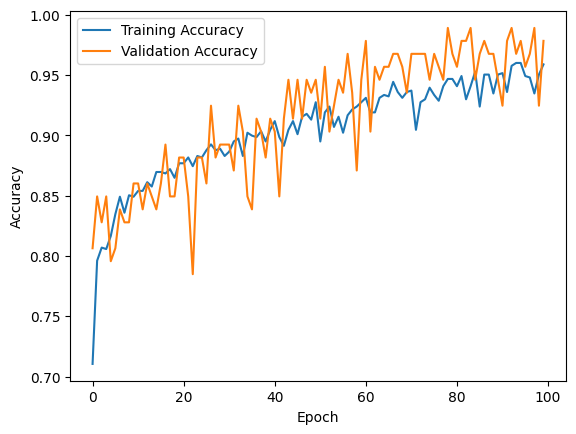

In [109]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Explainable AI (XAI)

c:\Users\AHMED\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


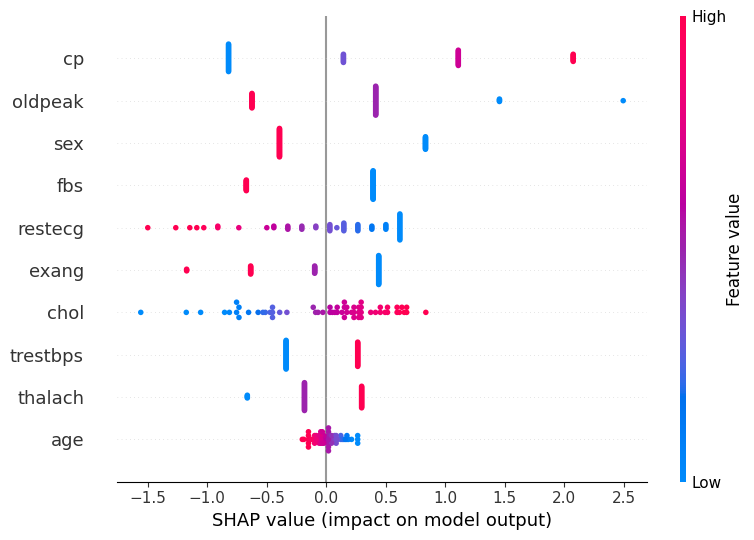

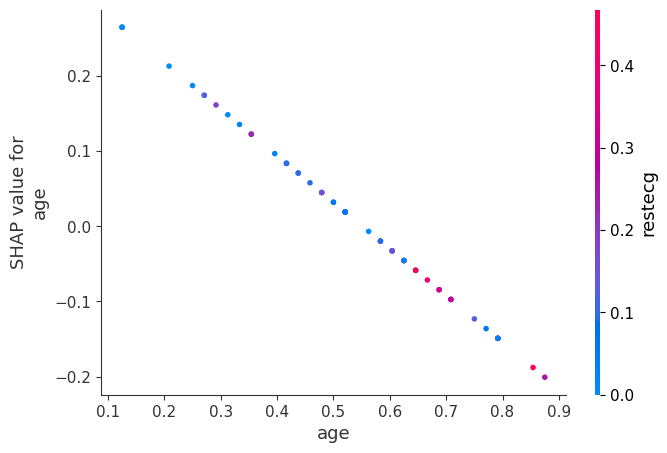

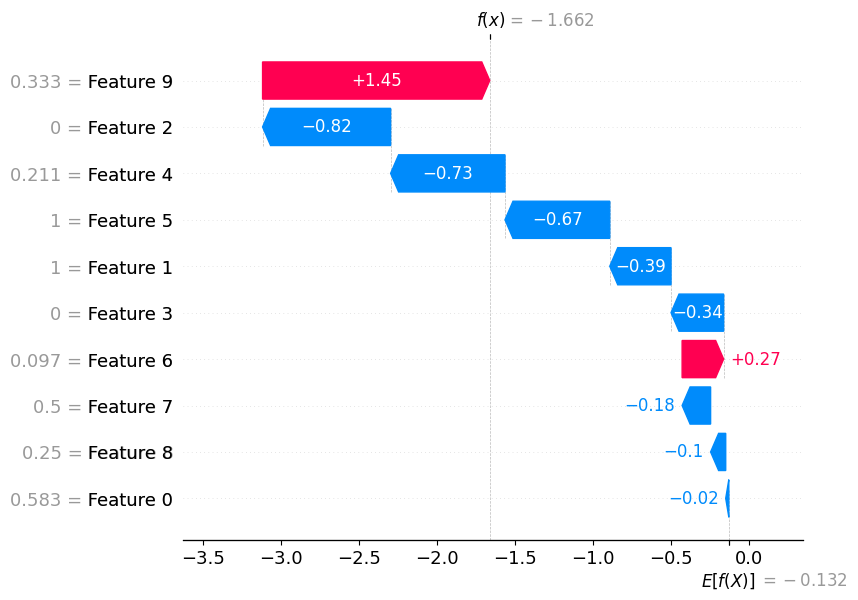

In [37]:
import shap
# Extract feature names and class names
feature_names = data.columns[:-1].tolist()
class_names = data['target'].unique().astype(str).tolist()

# Split the data into features and target
X = data[feature_names].values
y = data['target'].values

shap_explainer = shap.Explainer(best_lr_pipeline.named_steps['classifier'], X_train)
shap_values = shap_explainer(X_test)

shap.summary_plot(shap_values, X_test, feature_names=feature_names)

shap.dependence_plot('age', shap_values.values, X_test, feature_names=feature_names)

shap.initjs()

shap.waterfall_plot(shap_values[0])

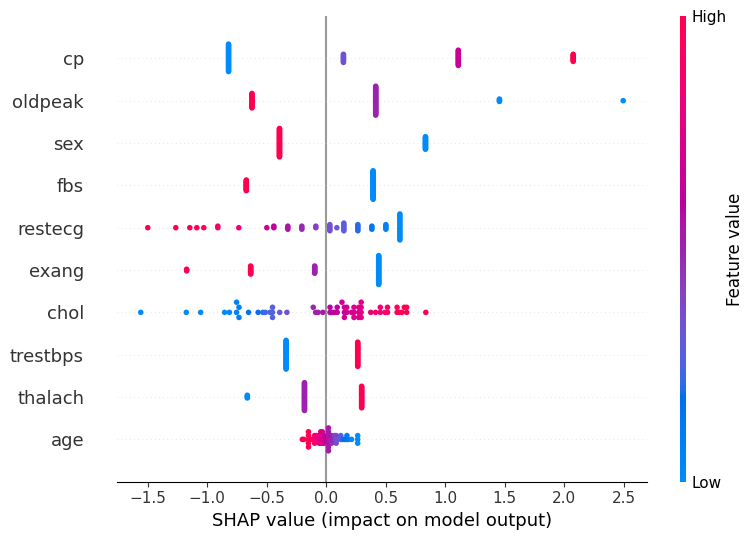

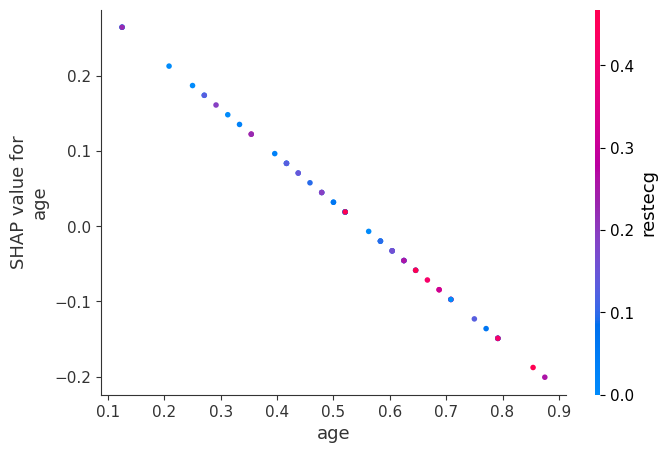

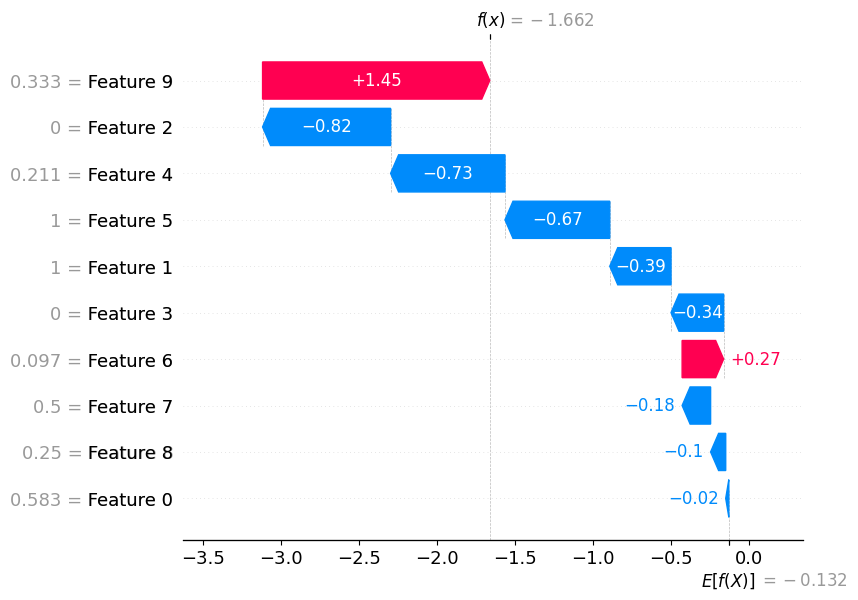

In [38]:
import shap
# Extract feature names and class names
feature_names = data.columns[:-1].tolist()
class_names = data['target'].unique().astype(str).tolist()

# Split the data into features and target
X = data[feature_names].values
y = data['target'].values

shap_values = shap_explainer(X_test)

shap.summary_plot(shap_values, X_test, feature_names=feature_names)

shap.dependence_plot('age', shap_values.values, X_test, feature_names=feature_names)

shap.initjs()

shap.waterfall_plot(shap_values[0])

In [39]:
from lime.lime_tabular import LimeTabularExplainer
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(X_train, 
                                                   feature_names=selected_feature_names, class_names=['No Disease', 'Disease'], 
                                                   discretize_continuous=True)
instance = X_test[0].reshape(1, -1)


In [40]:
exp = explainer.explain_instance(instance[0], best_svm_pipeline.predict_proba, num_features=10)
exp.show_in_notebook(show_table=True)

In [41]:
# Explain KNN model
exp = explainer.explain_instance(instance[0], best_knn_pipeline.predict_proba, num_features=10)
exp.show_in_notebook(show_table=True)

In [42]:
# Explain XGBoost model
exp = explainer.explain_instance(instance[0], best_xgb_pipeline.predict_proba, num_features=10)
exp.show_in_notebook(show_table=True)

In [43]:
# Initialize LimeTabularExplainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, 
                                                   feature_names=selected_feature_names.tolist(), 
                                                   class_names=['No Disease', 'Disease'], 
                                                   discretize_continuous=True)

In [44]:
model = create_model()
model.fit(X_train, y_train, epochs=100, batch_size=best_batch_size, verbose=1, validation_split=0.1)

# Wrap the predict function to use with Lime
def nn_predict_proba(x):
    try:
        return np.hstack((1 - model.predict_proba(x), model.predict_proba(x)))
    except AttributeError:
        return np.hstack((1 - model.predict(x), model.predict(x)))

# Explain instances using Lime
explainer = LimeTabularExplainer(X_train, feature_names=selected_feature_names.tolist(), 
                                 class_names=['No Disease', 'Disease'], discretize_continuous=True)
instance = X_test[0].reshape(1, -1)

# Explain the instance
exp = explainer.explain_instance(instance[0], nn_predict_proba, num_features=10)
exp.show_in_notebook(show_table=True)

NameError: name 'create_model' is not defined

In [45]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[
    ('SVM', SVM),
    ('XGB', xgb)
], voting='soft')

voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)


Accuracy: 0.8360655737704918
Precision: 0.7804878048780488
Recall: 0.9696969696969697
F1 Score: 0.8648648648648649
Confusion Matrix:



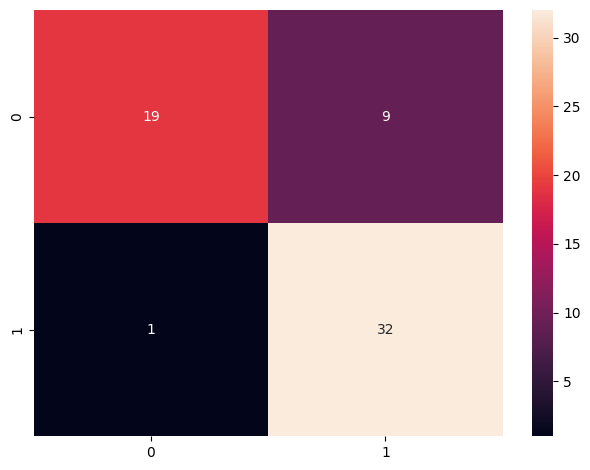

In [46]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n")

sns.heatmap(cm,annot=True)
plt.tight_layout()
plt.show()

In [47]:
y_train_pred = voting_clf.predict(X_train)
print(accuracy_score(y_train_pred,y_train_pred))

1.0


In [48]:
y_proba = voting_clf.predict_proba(X_test)

y_proba

array([[0.82927269, 0.1707273 ],
       [0.63882313, 0.36117687],
       [0.97255686, 0.02744314],
       [0.3399696 , 0.6600304 ],
       [0.24784703, 0.75215297],
       [0.855533  , 0.144467  ],
       [0.16457542, 0.83542458],
       [0.76911056, 0.23088942],
       [0.12630142, 0.87369858],
       [0.17401467, 0.82598533],
       [0.80334998, 0.19665001],
       [0.35742349, 0.64257651],
       [0.93590631, 0.06409367],
       [0.21967234, 0.78032766],
       [0.04199433, 0.95800567],
       [0.08578888, 0.91421112],
       [0.12777936, 0.87222064],
       [0.21905923, 0.78094077],
       [0.12636747, 0.87363253],
       [0.25466615, 0.74533385],
       [0.3348615 , 0.6651385 ],
       [0.71949587, 0.28050415],
       [0.09623165, 0.90376835],
       [0.15432985, 0.84567015],
       [0.16578802, 0.83421198],
       [0.95852045, 0.04147955],
       [0.69430449, 0.3056955 ],
       [0.28004657, 0.71995343],
       [0.86786103, 0.13213897],
       [0.35000567, 0.64999433],
       [0.

In [49]:
exp = explainer.explain_instance(instance[0], voting_clf.predict_proba, num_features=10)
exp.show_in_notebook(show_table=True)

## Save the model

In [50]:
from joblib import dump

dump(voting_clf,'best_model.pkl')

['best_model.pkl']